# Loading and Visualizing ALOS-2 data

You would first need to download and load the ALOS-2 data using a library like rasterio. Let's assume you have downloaded and preprocessed the ALOS-2 data as GeoTIFF files.

In [1]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.colors as colors

## Load the ALOS-2 images

This Python code snippet is for loading and reading two ALOS-2 SAR (Synthetic Aperture Radar) images using the rasterio library, which is commonly used for working with geospatial raster data.

In [3]:
# Load the ALOS-2 images
image_path1 = '/home/jovyan/shared/Sirinya/alos/ALOS2210180680-180414_cut.tif'
image_path2 = '/home/jovyan/shared/Sirinya/alos/ALOS2222600680-180707_cut.tif'  # Update the path for the second image

with rasterio.open(image_path1) as src1, rasterio.open(image_path2) as src2:
    image1 = src1.read(1)  # First band of the first image
    image2 = src2.read(1)  # First band of the second image
    transform1 = src1.transform
    transform2 = src2.transform

## Apply a Speckle Filter

This code applies a focal mean filter to the two SAR images (image1 and image2) to reduce speckle noise. Speckle is a common issue in SAR images, and the focal mean (also called a moving average filter) helps smooth the image by averaging pixel values in a local neighborhood.

In [4]:
# Apply a focal mean filter to reduce speckle noise
def focal_mean(image, size=3):
    kernel = np.ones((size, size)) / (size * size)
    return ndimage.convolve(image, kernel, mode='reflect')

image1_filtered = focal_mean(image1, size=30)
image2_filtered = focal_mean(image2, size=30)

## Visualize the ALOS-2 images

This code is used to visualize the original and filtered versions of the first SAR image (e.g. image1 and image1_filtered) without applying any geospatial transformations. It utilizes Matplotlib to display the images in a side-by-side format.

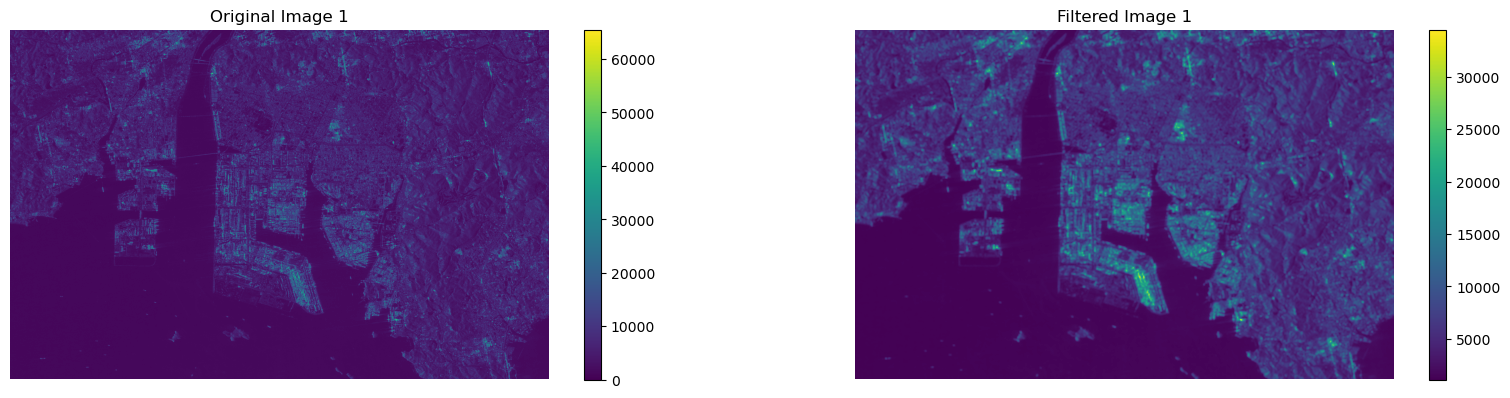

In [15]:
# Visualize the images without transform
plt.figure(figsize=(20, 10))
 
# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.colorbar()
plt.title('Original Image 1')
plt.axis('off')
 
# Display the filtered image
plt.subplot(2, 2, 2)
plt.imshow(image1_filtered)
plt.colorbar()
plt.title('Filtered Image 1')
plt.axis('off')
 
plt.show()

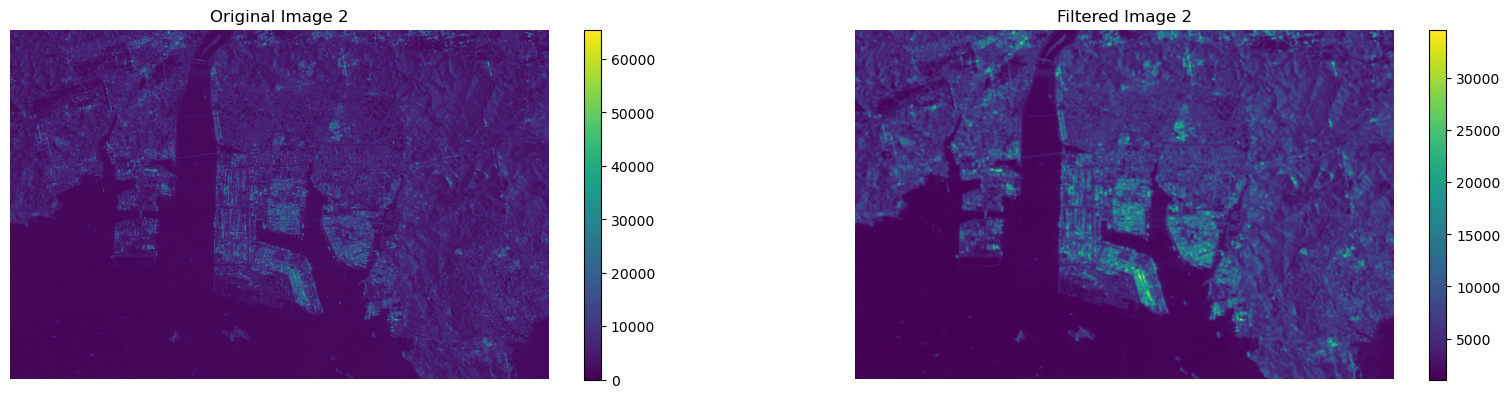

In [14]:
# Visualize the images without transform
plt.figure(figsize=(20, 10))
 
# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image2)
plt.colorbar()
plt.title('Original Image 2')
plt.axis('off')
 
# Display the filtered image
plt.subplot(2, 2, 2)
plt.imshow(image2_filtered)
plt.colorbar()
plt.title('Filtered Image 2')
plt.axis('off')
 
plt.show()

## Visualization of SAR images with grayscale mapping

This code defines a function to visualize SAR images using a grayscale color map and applies it to both the original and filtered versions of two SAR images (image1, image1_filtered, image2, and image2_filtered).

This code helps visualize the intensity patterns in the SAR images using grayscale mapping, which is useful for interpreting SAR data.

In [1]:
# Visualization of SAR images with grayscale mapping
def visualize_with_grayscale(image, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')  # Set the colormap to grayscale
    plt.colorbar()  # Add a colorbar to indicate intensity levels
    plt.title(title)
    plt.axis('off')
    plt.show()

# Apply grayscale visualizations to both original and filtered images
# For Image 1
visualize_with_grayscale(image1, 'Original Image 1 in Grayscale')
visualize_with_grayscale(image1_filtered, 'Filtered Image 1 in Grayscale')

# For Image 2
visualize_with_grayscale(image2, 'Original Image 2 in Grayscale')
visualize_with_grayscale(image2_filtered, 'Filtered Image 2 in Grayscale')


NameError: name 'image1' is not defined

## Visualization of SAR images with color mapping

This code defines a function to visualize SAR images using different color maps and applies it to both the original and filtered versions of the images. The color maps used here are Viridis and Plasma, two commonly used colormaps in data visualization that can highlight intensity variations more clearly than grayscale.

This technique of using color maps can reveal features that might not be as evident in grayscale, making it useful for analyzing SAR images in detail.

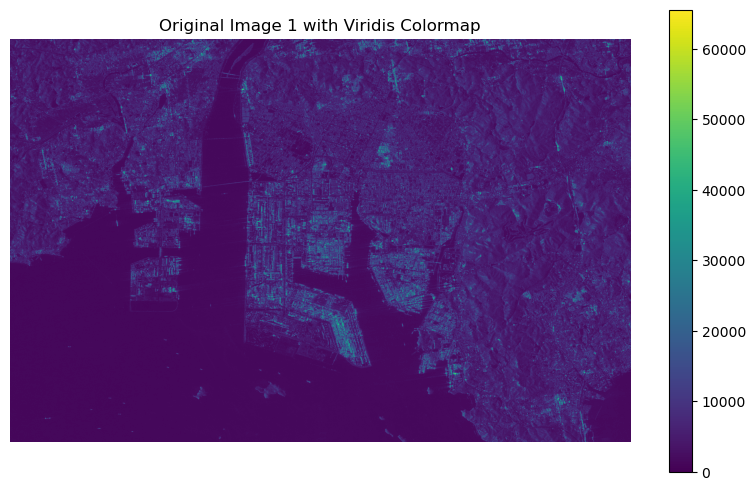

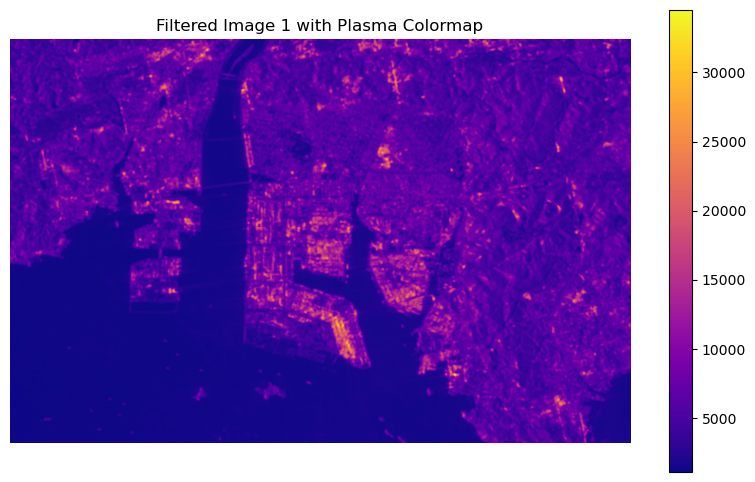

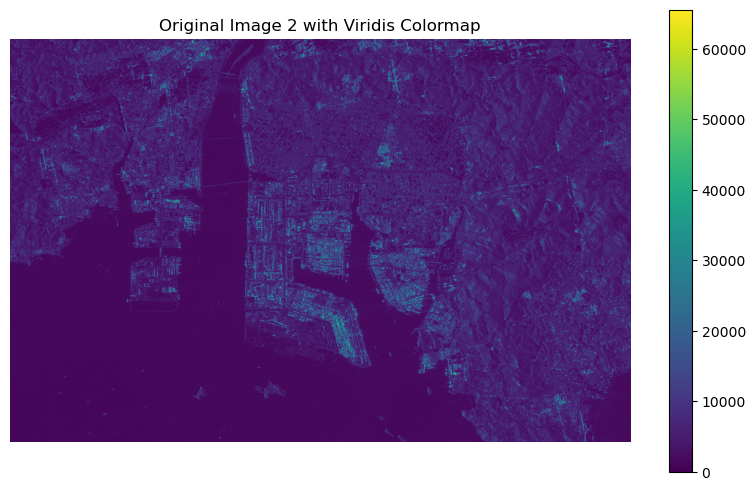

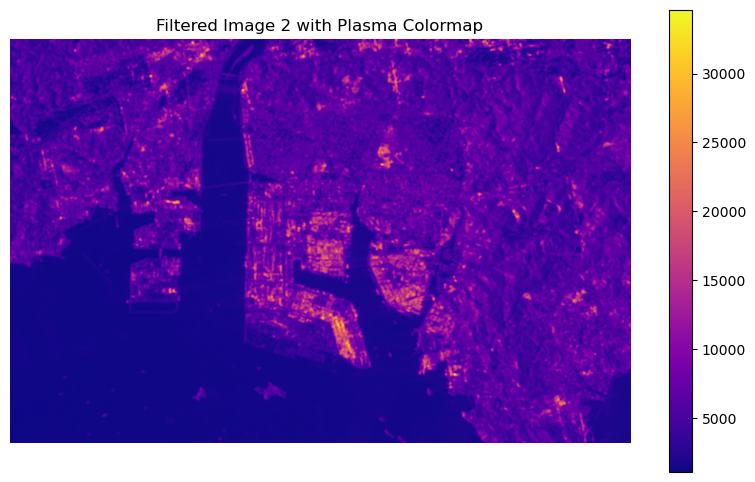

In [8]:
# Visualization of SAR images with color mapping
def visualize_with_colormap(image, title, cmap='viridis'):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap=cmap)
    plt.colorbar()  # Add a colorbar to indicate intensity levels
    plt.title(title)
    plt.axis('off')
    plt.show()

# Apply colormap visualizations to both original and filtered images
# For Image 1
visualize_with_colormap(image1, 'Original Image 1 with Viridis Colormap', cmap='viridis')
visualize_with_colormap(image1_filtered, 'Filtered Image 1 with Plasma Colormap', cmap='plasma')

# For Image 2
visualize_with_colormap(image2, 'Original Image 2 with Viridis Colormap', cmap='viridis')
visualize_with_colormap(image2_filtered, 'Filtered Image 2 with Plasma Colormap', cmap='plasma')


## Computing and Visualizing Histogram with Statistical Annotations

This code computes the histogram of an image, showing the distribution of pixel intensities, and plots it using matplotlib. The histogram bins (hist) are computed along with the image's mean and variance. The plot is then annotated with red dashed lines for the mean and green dashed lines for ±1 standard deviation (SD), representing variance. Text labels indicate these values on the graph, and the figure includes titles, axis labels, and gridlines for better readability of pixel intensity distribution.

In [9]:
# Compute histograms for the original and filtered images of Image 1
def plot_histogram(image, title):
    hist, bin_edges = np.histogram(image, bins=255)
    mean_val = np.mean(image)
    var_val = np.var(image)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

    # Annotate the mean and variance on the plot
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean_val, max(hist) * 0.9, f'Mean: {mean_val:.2f}', color='red')

    plt.axvline(mean_val + np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(mean_val - np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
    plt.text(mean_val + np.sqrt(var_val), max(hist) * 0.8, f'+1 SD: {np.sqrt(var_val):.2f}', color='green')
    plt.text(mean_val - np.sqrt(var_val), max(hist) * 0.8, f'-1 SD: {np.sqrt(var_val):.2f}', color='green')

    # Add titles and labels
    plt.title(f'Histogram of {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

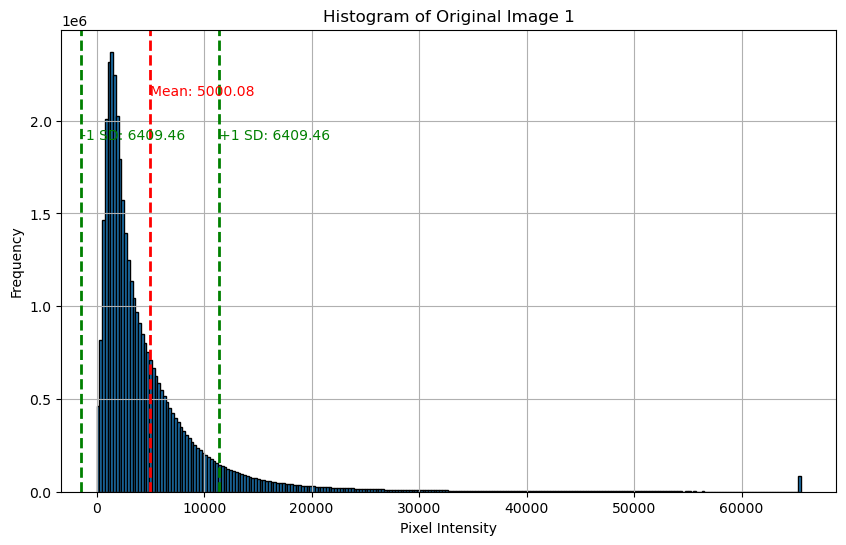

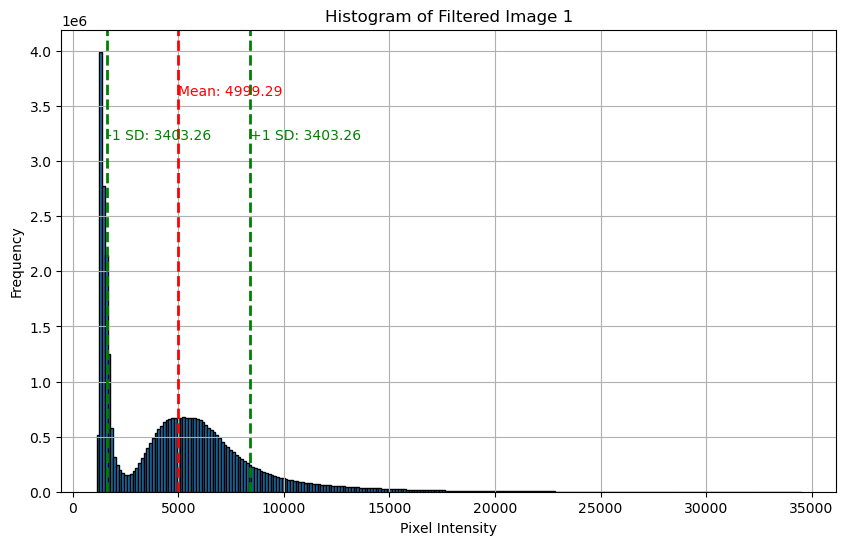

In [10]:
# Plot histograms for both images and their filtered versions
plot_histogram(image1, 'Original Image 1')
plot_histogram(image1_filtered, 'Filtered Image 1')

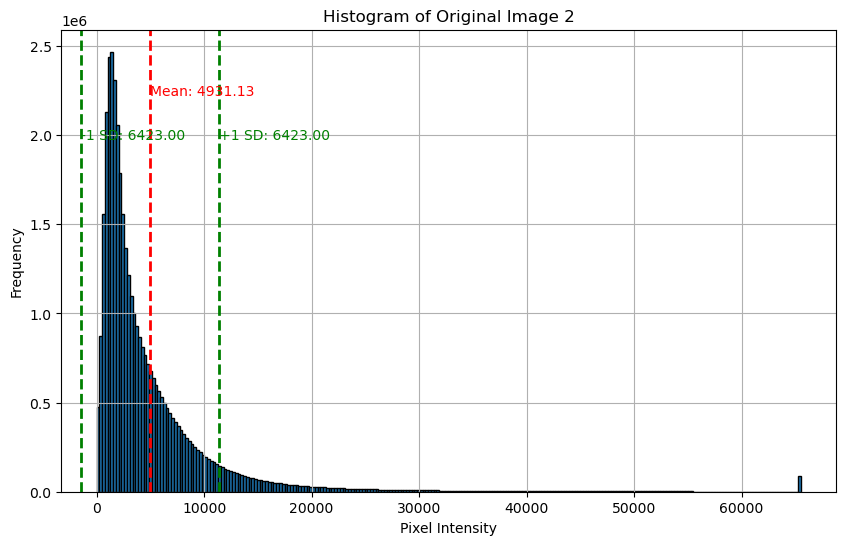

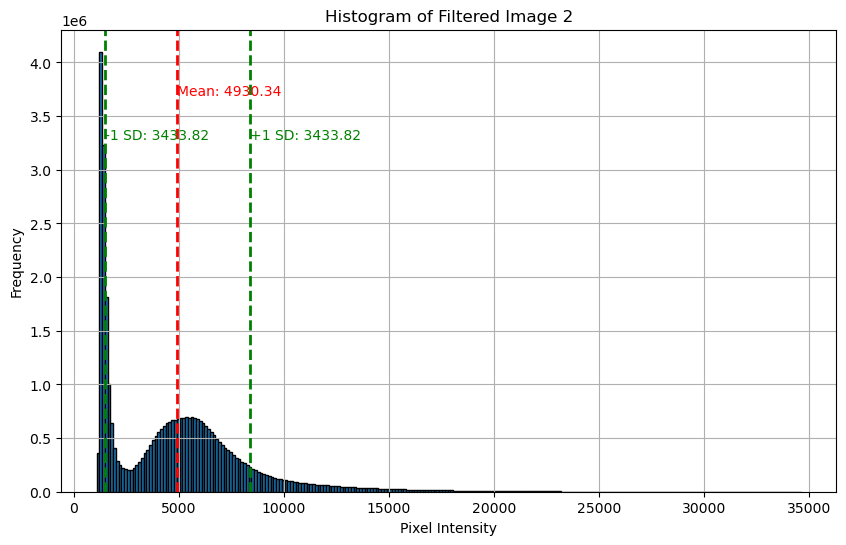

In [11]:
plot_histogram(image2, 'Original Image 2')
plot_histogram(image2_filtered, 'Filtered Image 2')